In [1]:
# importing tool functions
import numpy as np
import matplotlib.pyplot as plt
from tools import utils, ml_tools
import pandas as pd
import numpy as np

# machine learning imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils

# graphing tools
import seaborn as sns
from scipy.stats import sem
import matplotlib
import scienceplots

plt.style.use(['science', 'ieee','no-latex'])
matplotlib.rc('font', family='times new roman')

# time
import time

In [2]:
# DIRECTORY FOR PICKLED FILES
dir_name_e = r'C:\Users\EfiaA\OneDrive - Imperial College London\Imperial academic work\University life\Y4\MSci project\Project_Coding\nlp-physicseducation\Pickledfiles'

In [6]:
# importing tool functions
import numpy as np
import matplotlib.pyplot as plt
from tools import utils, ml_tools
import pandas as pd
import numpy as np

# graphing tools
import seaborn as sns
from scipy.stats import sem
import matplotlib
import scienceplots

plt.style.use(['science', 'ieee','no-latex'])
matplotlib.rc('font', family='times new roman')

# time
import time 

# importing the NN
from NN_tools import NN_data, NN_data_iteration
from NN_tools import NN_optimised_parameters, NN_default_parameters, one_hot_enc_labels_bow, one_hot_enc_labels_tf
from NN_tools import convert_to_preferred_format, nn_graph, nn_graph_loss

## 1.Import datasets

##### Below are the imports of several datasets. This includes: year1, year 2 and year 1 & year 2 combined. They are all in csv file format and so are imported using pandas. Moreoever, each csv file is made in to a dataframe. Also note that the documents are pre-processed.

In [7]:
#Y1
dir_csv_y1 = 'outputs/labels_cleaned_y2.csv'
df_y1     = pd.read_csv(dir_csv_y1, encoding='utf-8')

#Y2
dir_csv_y2 = 'outputs/labels_cleaned_y2.csv'
df_y2      = pd.read_csv(dir_csv_y2, encoding='utf-8')


#Y1Y2
dir_csv_y1y2 = 'outputs/labels_cleaned_y1y2.csv'
df_y1y2      = pd.read_csv(dir_csv_y1y2, encoding='utf-8')

## 2. YEAR 1 NN 

##### The Optimised Neural Network will be ran on the default for each feature extraction technique: bow and TF-IDF. The aim is to see the effect of the optimised Neural Network on the first set of data. The code below incoporates the appropriate feature extraction techniques.

In [8]:
labels = ['ArgumentLevel','ReasoningLevel'] # 'ArgumentLevel', 'ReasoningLevel'
#labels2 = ['ArgumentLevel','ReasoningLevel','ArgumentLevel','ReasoningLevel'] # 'ArgumentLevel', 'ReasoningLevel'
features = ['tfidf','bow'] #'bow', 'ifidf'
num_epochs = 20
num_iter   = 
train_sizes = [0.5,0.6,0.7,0.8,0.9] # proportion of training data

In [9]:

accuracies     = []
accuracies_sd  = []
loss           = []
val_loss       = []

feature2 = []
labels2  = []


times = []

for label in labels:
    for feature in features:
        # -- Feature extraction: TF-IDF ---
        if feature ==  'tfidf':

            starttime = time.time()
            wordvec_names, wordvec_counts = np.array(ml_tools.tf_idf(df_y1['Content'].tolist()), dtype = object)
            y_tf                          = one_hot_enc_labels_tf(df_y1, label)
            print('tfidf')

            # NN training 
            t = NN_data(NN_optimised_parameters,  wordvec_counts, y_tf, 
                         train_sizes, num_epochs, label, feature, 'y1', dir_name_e )
            
            # adding results to list
            accuracies.append(t['accuracy'])
            accuracies_sd.append(t['sem'])
            loss.append(t['loss'])
            val_loss.append(t['valloss'])

            # column titles
            feature2.append(feature)
            labels2.append(label)

            endtime = (time.time() - starttime)/60
            times.append(convert_to_preferred_format(endtime))

        # -- Feature extraction: Bag of Words ---
        elif feature == 'bow':
            starttime = time.time()
            wordvec_names, wordvec_counts = np.array(ml_tools.tf_idf(df_y1['Content'].tolist()), dtype = object)
            y_b                           = one_hot_enc_labels_bow(df_y1, label)
            print('tfidf')

            # NN training 
            t = NN_data(NN_optimised_parameters,  wordvec_counts, y_b, 
                         train_sizes, num_epochs, label, feature, 'y1', dir_name_e )
            
            # adding results to list
            accuracies.append(t['accuracy'])
            accuracies_sd.append(t['sem'])
            loss.append(t['loss'])
            val_loss.append(t['valloss'])

            # column titles
            feature2.append(feature)
            labels2.append(label)

            endtime = time.time() - starttime
            times.append(convert_to_preferred_format(endtime))

df_nn_y1 = pd.DataFrame({ 'Label': labels2, 'feature extraction':feature2, 'accuracy':accuracies, 'sem': accuracies_sd, 'loss': loss, 'val_loss': val_loss, 'time':times})


tfidf
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                65424     
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
 flatten (Flatten)           (None, 1)                 0         
                                                                 
Total params: 65,537
Trainable params: 65,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
2/2 [==============================] - 1s 197ms/step - loss: 0.6936 - accuracy: 0.3610 - val_loss: 0.6900 - val_accuracy: 0.8000
Epoch 2/20
2/2 [======================

In [10]:
name_df_nn_y1  = 'W5_NN_Y1_RESULTS_DF_20ephs_2500iterations'
pickle_df_nn_y1 = utils.save_as_pickle_file(df_nn_y1, name_df_nn_y1, dir_name_e)

In [11]:
unpickle_df_nn_y1 = utils.load_pickle_file_to_df(name_df_nn_y1, dir_name_e)

##### Here we use the nn_graph function to plot the essential values that are found in  the dataframe. 

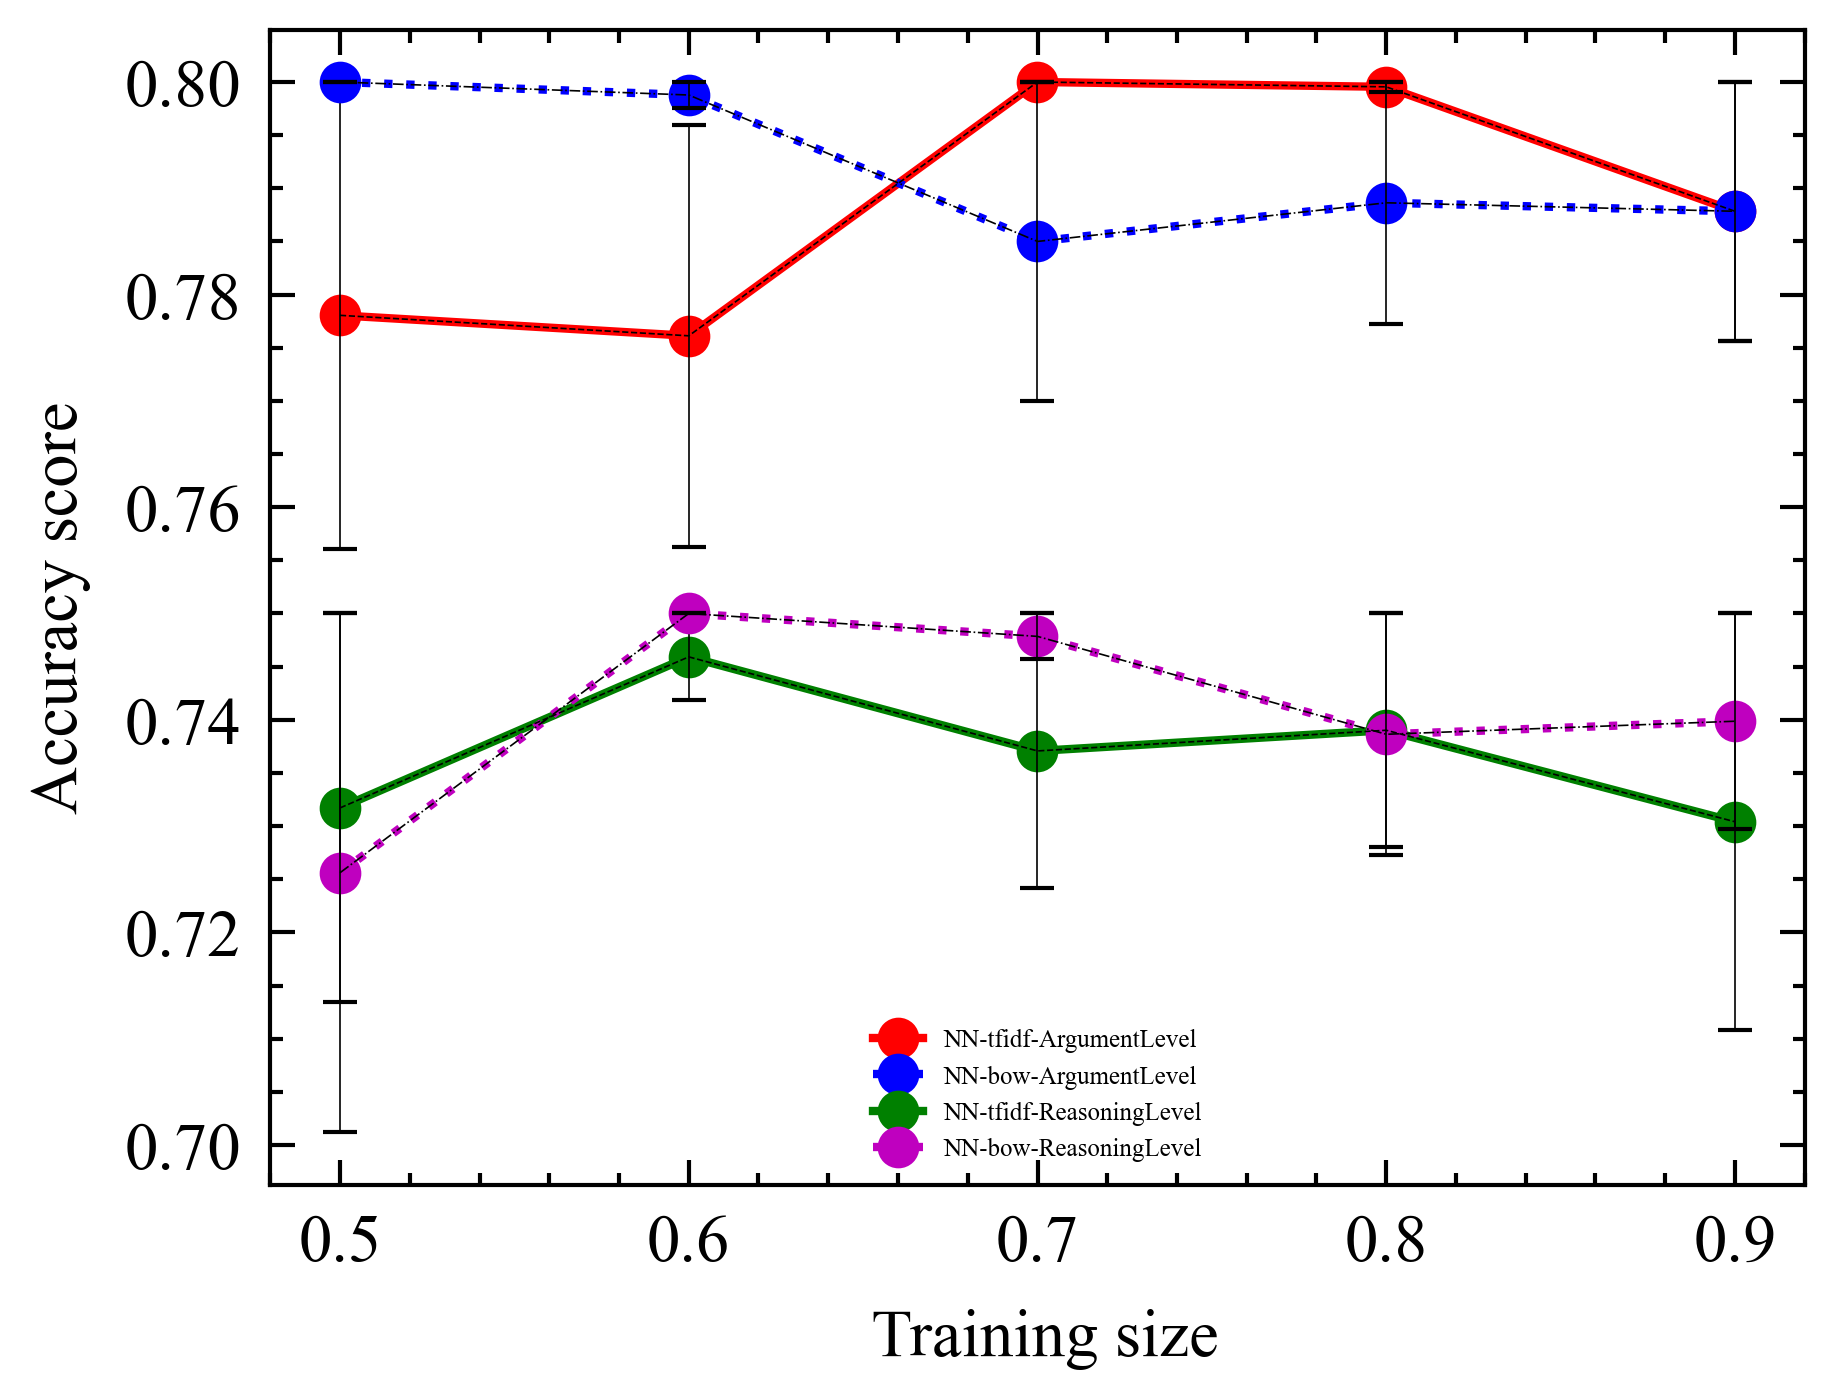

In [12]:
nn_graph(train_sizes, unpickle_df_nn_y1, 'NN')

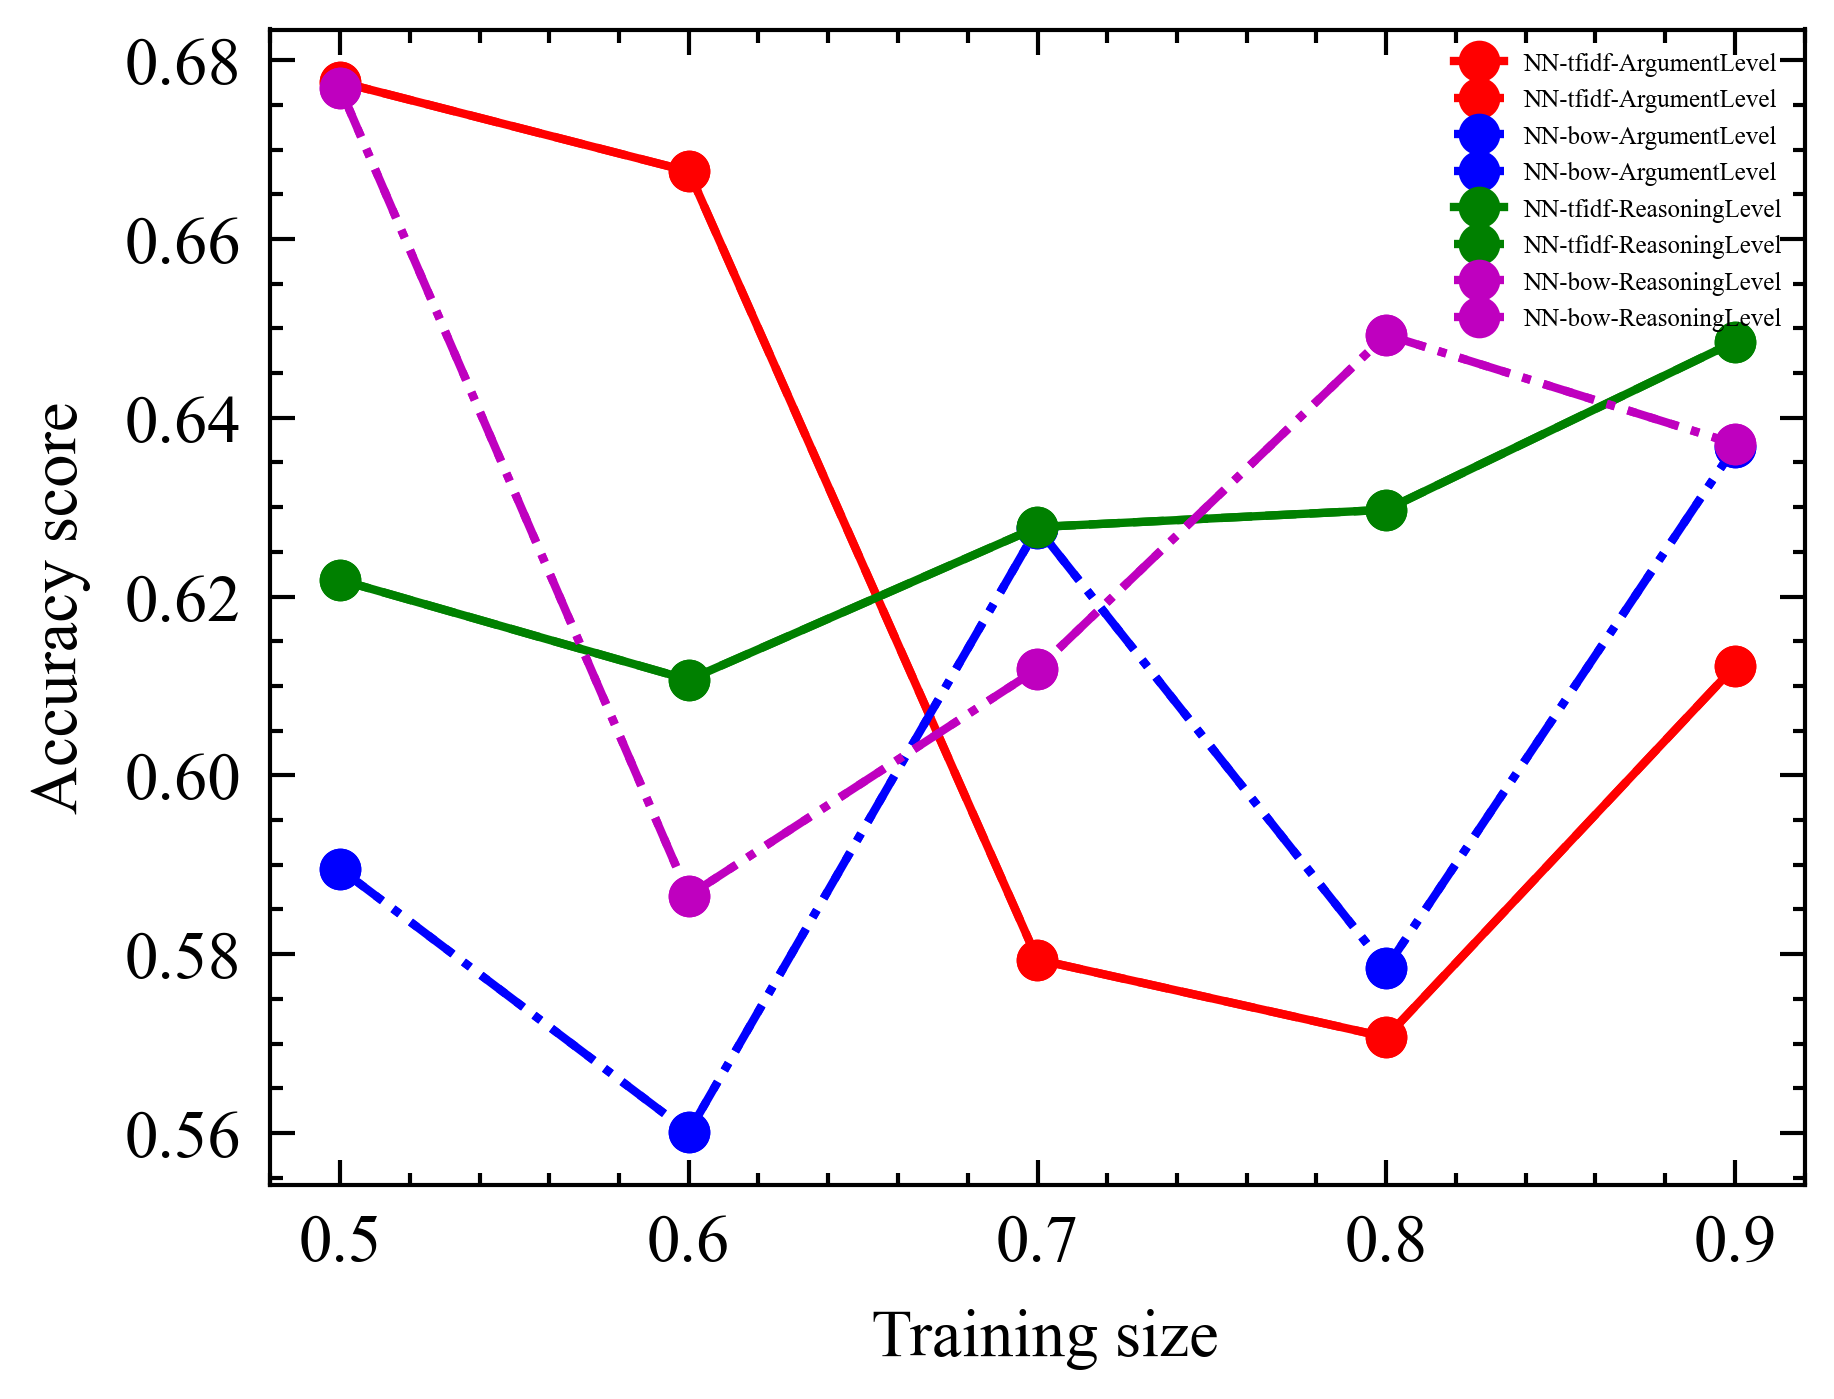

In [13]:
nn_graph_loss(train_sizes,unpickle_df_nn_y1,'NN')